In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/kuhimans/Comcast-Telecom-Consumer-Complaints-Analysis/master/Comcast_telecom_complaints_data.csv'
df = pd.read_csv(url)
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [2]:
df["date_index"] = df["Date_month_year"] + " " + df["Time"]

In [3]:
df["date_index"] = pd.to_datetime(df["date_index"])
df["Date_month_year"] = pd.to_datetime(df["Date_month_year"])

In [4]:
df.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
date_index                     datetime64[ns]
dtype: object

In [5]:
df = df.set_index(df["date_index"])

In [6]:
df.head(3)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index
date_index,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47


In [7]:
df["Date_month_year"].value_counts()[:3]

2015-06-24    218
2015-06-23    190
2015-06-25     98
Name: Date_month_year, dtype: int64

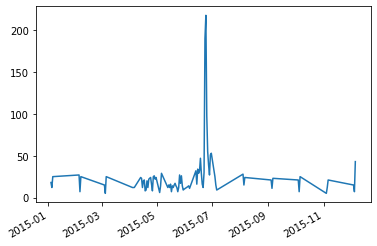

In [8]:
df["Date_month_year"].value_counts().plot();

In [9]:
f = df.groupby(pd.Grouper(freq="M")).size()

In [10]:
f.head()

date_index
2015-01-31     55
2015-02-28     59
2015-03-31     45
2015-04-30    375
2015-05-31    317
Freq: M, dtype: int64

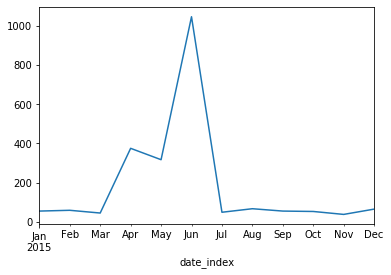

In [11]:
df.groupby(pd.Grouper(freq="M")).size().plot()

In [12]:
df.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [13]:
df["newStatus"] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in df["Status"]]

In [14]:
df.head(3)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,newStatus
date_index,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,Closed
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,Closed
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,Closed


In [15]:
df.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1)[:5]

,State,Count
0,Georgia,288
1,Florida,240
2,California,220
3,Illinois,164
4,Tennessee,143


In [16]:
Status_complaints = df.groupby(["State","newStatus"]).size().unstack().fillna(0)
Status_complaints

newStatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


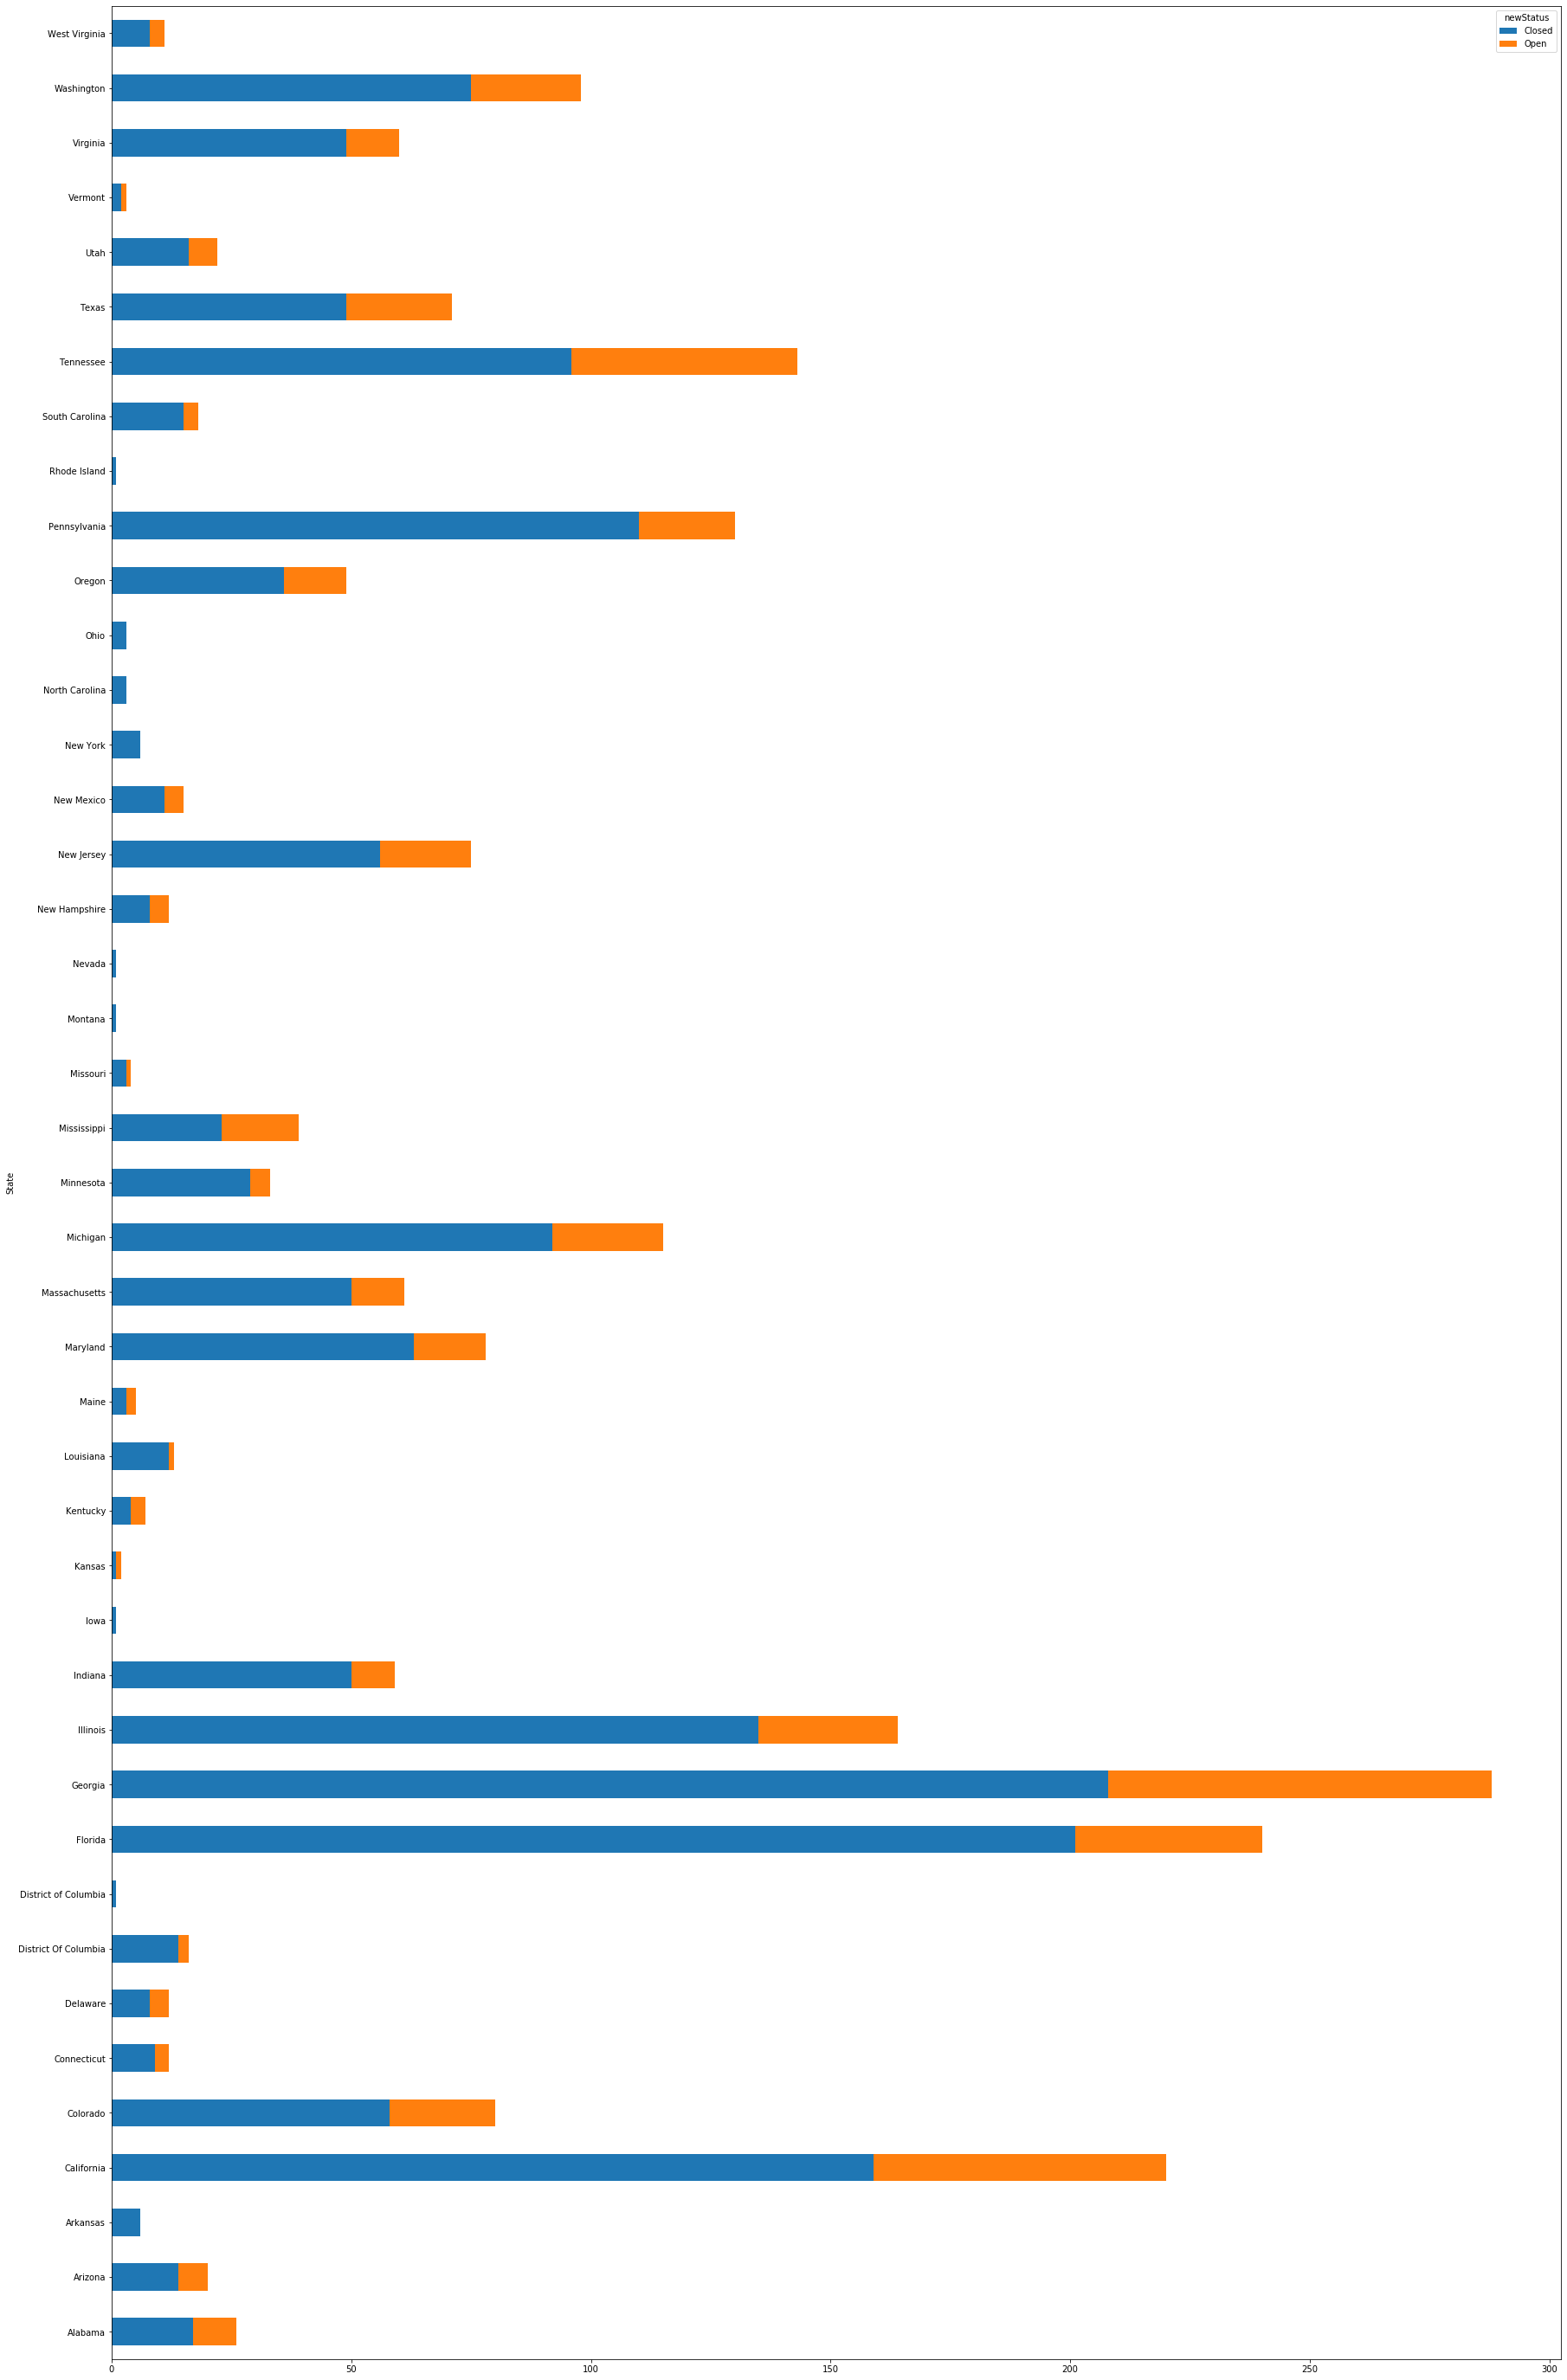

In [17]:
Status_complaints.plot(kind="barh", figsize=(30,50), stacked=True)

In [18]:
df.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1).max()

State    West Virginia
Count              288
dtype: object

In [19]:
df.groupby(["State","newStatus"]).size().unstack().fillna(0).max()

newStatus
Closed    208.0
Open       80.0
dtype: float64

In [20]:
!pip install wordcloud

In [21]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [22]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join([ch for ch in stop_free if ch not in exclude])
    normalised = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalised

In [23]:
doc_complete = df["Customer Complaint"].tolist()
doc_clean = [clean(doc).split() for doc in doc_complete]

In [24]:
import gensim
from gensim import corpora

In [25]:
dictionary = corpora.Dictionary(doc_clean)
print(dictionary)

Dictionary(1412 unique tokens: ['cable', 'comcast', 'internet', 'speed', 'disappear']...)


In [26]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
doc_term_matrix

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(3, 1), (8, 1)],
 [(1, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)],
 [(1, 1), (8, 1), (16, 1), (17, 1)],
 [(18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)],
 [(8, 1), (10, 1), (20, 1), (25, 1), (26, 1)],
 [(1, 1), (8, 1), (27, 1), (28, 1), (29, 1), (30, 1)],
 [(1, 1), (31, 1), (32, 1)],
 [(1, 1), (33, 1), (34, 1), (35, 1), (36, 1)],
 [(5, 1), (8, 1), (37, 1), (38, 1)],
 [(39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1)],
 [(1, 1),
  (2, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1)],
 [(2, 1), (3, 1)],
 [(2, 1), (54, 1), (55, 1), (56, 1)],
 [(2, 1), (57, 1)],
 [(2, 1), (3, 1), (58, 1)],
 [(1, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1)],
 [(2, 1), (8, 1), (66, 1)],
 [(8, 1), (40, 1), (67, 1), (68, 1), (69, 1)],
 [(2, 1), (70, 1), (71, 1)],
 [(0, 1), (8, 2), (66, 1), (72, 1)],
 [(3, 1)],
 [(1

In [27]:
from gensim.models import LdaModel

In [28]:
Num_Topic = 9
ldamodel = LdaModel(doc_term_matrix, num_topics= Num_Topic, id2word= dictionary, passes= 30)

In [29]:
topics = ldamodel.show_topics()
for topic in topics:
    print(topic)
    print()

(0, '0.247*"billing" + 0.137*"comcast" + 0.103*"issue" + 0.067*"practice" + 0.058*"unfair" + 0.044*"pricing" + 0.019*"monopolistic" + 0.012*"several" + 0.011*"throttled" + 0.011*"phone"')

(1, '0.210*"comcast" + 0.169*"data" + 0.137*"cap" + 0.032*"usage" + 0.020*"fee" + 0.018*"connection" + 0.017*"without" + 0.013*"limit" + 0.011*"installation" + 0.010*"unreliable"')

(2, '0.056*"comcast" + 0.049*"bill" + 0.036*"charged" + 0.033*"deceptive" + 0.029*"equipment" + 0.028*"monthly" + 0.026*"sale" + 0.022*"year" + 0.018*"misleading" + 0.018*"modem"')

(3, '0.101*"comcast" + 0.076*"xfinity" + 0.051*"internet" + 0.042*"price" + 0.038*"problem" + 0.025*"account" + 0.020*"broadband" + 0.019*"monopoly" + 0.018*"contract" + 0.012*"ps4"')

(4, '0.142*"service" + 0.090*"customer" + 0.070*"comcast" + 0.023*"access" + 0.019*"billed" + 0.019*"refund" + 0.015*"bad" + 0.015*"bill" + 0.014*"horrible" + 0.014*"12"')

(5, '0.222*"service" + 0.191*"internet" + 0.145*"comcast" + 0.029*"poor" + 0.015*"busines

In [30]:
word_dict = {}
for i in range(Num_Topic):
    words = ldamodel.show_topic(i, topn =20)
    word_dict["Topic # " + "{}".format(i)] = [i[0] for i in words]

In [31]:
pd.DataFrame(word_dict)

,Topic # 0,Topic # 1,Topic # 2,Topic # 3,Topic # 4,Topic # 5,Topic # 6,Topic # 7,Topic # 8
0,billing,comcast,comcast,comcast,service,service,comcast,comcast,internet
1,comcast,data,bill,xfinity,customer,internet,charge,complaint,speed
2,issue,cap,charged,internet,comcast,comcast,cable,service,comcast
3,practice,usage,deceptive,price,access,poor,terrible,comcastxfinity,slow
4,unfair,fee,equipment,problem,billed,business,month,get,throttling
5,pricing,connection,monthly,account,refund,outage,internet,pay,bill
6,monopolistic,without,sale,broadband,bad,home,day,switch,high
7,several,limit,year,monopoly,bill,xfinity,fraudulent,false,paying
8,throttled,installation,misleading,contract,horrible,contract,2,advertising,price
9,phone,unreliable,modem,ps4,12,failure,help,bait,lack
